In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
%cd /content/yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

/content/yolov5


In [3]:
!pip install Cython
!pip install ipython

In [5]:
import torch
import os
from IPython.display import Image, clear_output

# print(f"Setup Complete. Using torch{torch.__version__}")

In [6]:
!pip install roboflow

from roboflow import Roboflow

In [11]:
os.environ["DATASET_DIRECTORY"]="/content/datasets"

In [12]:

rf = Roboflow(api_key="avfuDVsH1gTx46eYwKJK")
project = rf.workspace("yolov5-object-detection-trybn").project("yolov5objectdetection")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/YOLOv5ObjectDetection-1 in yolov5pytorch:: 100%|██████████| 303/303 [00:00<00:00, 4927.78it/s]


In [14]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/YOLOv5ObjectDetection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

In [17]:
# %load_ext tensorboard
# %tensorboard --logdir runs

In [19]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/YOLOv5ObjectDetection-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/12 /content/datasets/YOLOv5ObjectDetection-1/valid/images/IMG-20231016-WA0008_jpg.rf.53b300a6ec4a6dbb01662e191bc3cc61.jpg: 416x416 1 Chair, 1 Pen, 7.8ms
image 2/12 /content/datasets/YOLOv5ObjectDetection-1/valid/images/IMG-20231016-WA0010_jpg.rf.95720d7a732bb9fee4729399b4ae9acc.jpg: 416x

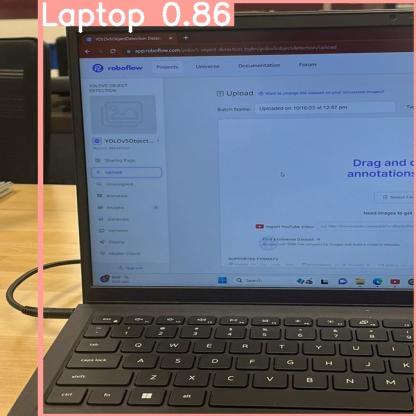

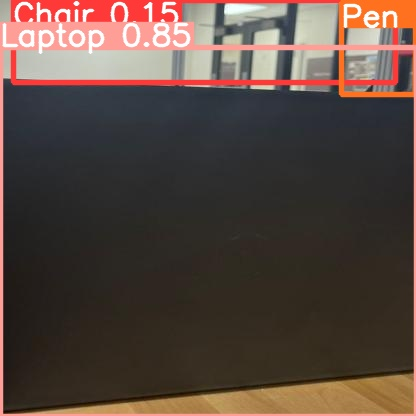

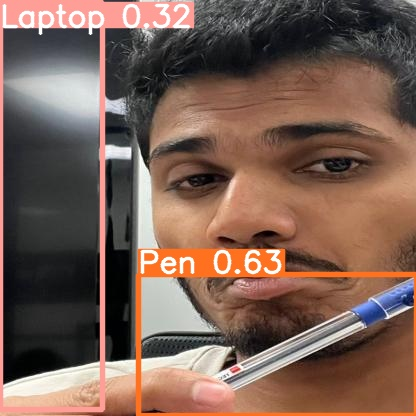

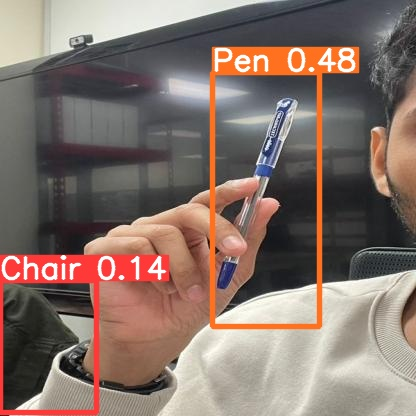

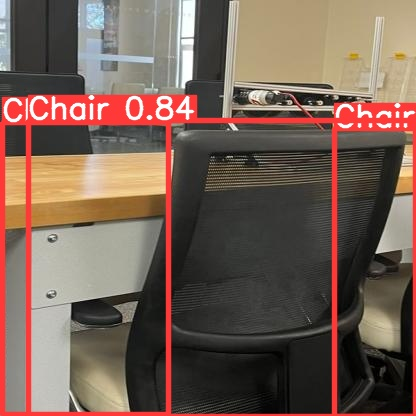

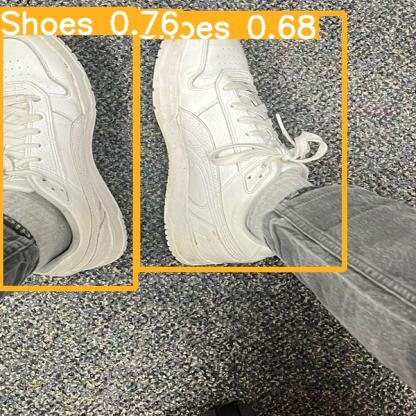

In [21]:
import glob

i=0

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'):
  i=i+1

  if i<7:
    display(Image(filename=imageName))
    print("\n")